In [1]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

import sys
sys.path.append('../../')

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [2]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [3]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

<center> Choose Bucket using pagerank vector with starting distribution on max degree </center>
---

In [14]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [ ]:
# let's take a look at the tables:
for i in other_alg_dfs:
    display(HTML('<h1>{}</h1>'.format(i)))
    display(other_alg_dfs[i])

print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE))

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [15]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

In [17]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada',
            'seedexsingle-prb', 'seedexsingle-prb-jac', 'seedexsingle-prb-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

## TopoAlign previous algorithms
---

In [18]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle          10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac      10041  0.731905   804  0.488138  0.414096   
          seedexsingle-ada      10381  0.756688   783  0.504716  0.434242   
          seedexsingle-prb       9409  0.685837   635  0.458350  0.378815   
          seedexsingle-prb-jac   8856  0.645528   505  0.433226  0.349970   
          seedexsingle-prb-ada   8850  0.645091   656  0.430930  0.348343   

                                Frobenius Norm  
yeast-fly seedexsingle              166.042163  
          seedexsingle-jac          171.061392  
          seedexsingle-ada          167.038918  
          seedexsingle-prb          178.297504  
          seedexsingle-prb-jac      184.396312  
          seedexsingle-prb-ada      184.461378

---

## Parameter Comparison (Pagerank Alpha = 0.85, Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [8]:
%%capture

# list of our algorithms
our_algs = ['seedexsingle-prd', 'seedexsingle-prd-jac', 'seedexsingle-prd-ada']


# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
keep_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        alg_dfs = []
        
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            
            for kr in keep_ratio:
                cs.SEED_KEEP_RATIO = kr
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

            alg_dfs.append(df)

        cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexsingle-prd     bucket size: 800  keep ratio: 0.1   9214  0.671623   605   
                                       keep ratio: 0.2   9242  0.673664   668   
                                       keep ratio: 0.3   8953  0.652599   334   
                                       keep ratio: 0.4   9424  0.686931   625   
                                       keep ratio: 0.5   9668  0.704716   666   
                                       keep ratio: 0.6   9476  0.690721   554   
                                       keep ratio: 0.7   9307  0.678402   567   
                     bucket size: 1000 keep ratio: 0.1   8805  0.641811   380   
                                       keep ratio: 0.2   9792  0.713755   633   
                                       keep ratio: 0.3   9794  0.713900   597   
                                       keep ratio: 0.4   9732  0.709381   578   
                                       keep ratio: 0.5   9208  0.671186   609   
                                       keep ratio: 0.6   9254  0.674539   611   
                                       keep ratio: 0.7   9245  0.673883   578   
                     bucket size: 1200 keep ratio: 0.1   9563  0.697062   343   
                                       keep ratio: 0.2   9807  0.714848   715   
                                       keep ratio: 0.3   9953  0.725490   508   
                                       keep ratio: 0.4   8845  0.644726   355   
                                       keep ratio: 0.5   8988  0.655150   324   
                                       keep ratio: 0.6   6296  0.458926   397   
                                       keep ratio: 0.7   5986  0.436329   383   
                     bucket size: 1400 keep ratio: 0.1   9985  0.727823   751   
                                       keep ratio: 0.2  10082  0.734893   657   
                                       keep ratio: 0.3   8856  0.645528   373   
                                       keep ratio: 0.4   9222  0.672206   321   
                                       keep ratio: 0.5   9410  0.685910   690   
                                       keep ratio: 0.6   9512  0.693345   646   
                                       keep ratio: 0.7   9123  0.664990   621   
seedexsingle-prd-jac bucket size: 800  keep ratio: 0.1   8674  0.632262   722   
                                       keep ratio: 0.2   8270  0.602814   446   
                                       keep ratio: 0.3   8504  0.619870   417   
                                       keep ratio: 0.4   7895  0.575479   397   
                                       keep ratio: 0.5   7479  0.545156   723   
                                       keep ratio: 0.6   7765  0.566003   596   
                                       keep ratio: 0.7   7622  0.555580   414   
                     bucket size: 1000 keep ratio: 0.1   9074  0.661418   341   
                                       keep ratio: 0.2   8777  0.639770   436   
                                       keep ratio: 0.3   8647  0.630294   437   
                                       keep ratio: 0.4   8092  0.589839   559   
                                       keep ratio: 0.5   7953  0.579707   611   
                                       keep ratio: 0.6   6931  0.505212   556   
                                       keep ratio: 0.7   6731  0.490633   451   
                     bucket size: 1200 keep ratio: 0.1   7669  0.559006   477   
                                       keep ratio: 0.2   8768  0.639114   578   
                                       keep ratio: 0.3   8690  0.633428   531   
                                       keep ratio: 0.4   7321  0.533639   617   
                                       keep ratio: 0.5   7065  0.514979   681   
                                       keep ratio: 0.6   6250  0.455573   423   
                                       keep ratio: 0.7   7430  0.541585   438   
         



### bucket size & seed size
---

In [10]:
%%capture

# list of our algorithms
our_algs = ['seedexsingle-prd', 'seedexsingle-prd-jac', 'seedexsingle-prd-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexsingle-prd     bucket size: 800  seed size: 100  8798  0.641300   429   
                                       seed size: 200  9923  0.723303   632   
                                       seed size: 300  9550  0.696115   603   
                                       seed size: 400  9668  0.704716   666   
                                       seed size: 500  8791  0.640790   590   
                                       seed size: 600  8705  0.634521   610   
                                       seed size: 700  9075  0.661491   552   
                                       seed size: 800  7553  0.550550   590   
                     bucket size: 1000 seed size: 100  8805  0.641811   380   
                                       seed size: 200  9792  0.713755   633   
                                       seed size: 300  9794  0.713900   597   
                                       seed size: 400  9732  0.709381   578   
                                       seed size: 500  9208  0.671186   609   
                                       seed size: 600  9254  0.674539   611   
                                       seed size: 700  9245  0.673883   578   
                                       seed size: 800  6012  0.438224   620   
                     bucket size: 1200 seed size: 100  6894  0.502515   458   
                                       seed size: 200  5335  0.388877   537   
                                       seed size: 300  9837  0.717035   627   
                                       seed size: 400  8952  0.652526   321   
                                       seed size: 500  9361  0.682338   322   
                                       seed size: 600  8988  0.655150   324   
                                       seed size: 700  9635  0.702311   653   
                                       seed size: 800  8727  0.636125   584   
                     bucket size: 1400 seed size: 100  6299  0.459144   533   
                                       seed size: 200  9791  0.713682   333   
                                       seed size: 300  8989  0.655223   463   
                                       seed size: 400  9083  0.662074   329   
                                       seed size: 500  9341  0.680881   623   
                                       seed size: 600  9432  0.687514   629   
                                       seed size: 700  9410  0.685910   690   
                                       seed size: 800  9244  0.673810   624   
seedexsingle-prd-jac bucket size: 800  seed size: 100  8470  0.617392   447   
                                       seed size: 200  8269  0.602741   547   
                                       seed size: 300  6205  0.452292   503   
                                       seed size: 400  7479  0.545156   723   
                                       seed size: 500  8041  0.586121   574   
                                       seed size: 600  5247  0.382462   206   
                                       seed size: 700  6369  0.464247   551   
                                       seed size: 800  8137  0.593119   431   
                     bucket size: 1000 seed size: 100  9074  0.661418   341   
                                       seed size: 200  8777  0.639770   436   
                                       seed size: 300  8647  0.630294   437   
                                       seed size: 400  8092  0.589839   559   
                                       seed size: 500  7953  0.579707   611   
                                       seed size: 600  6931  0.505212   556   
                                       seed size: 700  6731  0.490633   451   
                                       seed size: 800  6618  0.482397   512   
                     bucket size: 1200 seed size: 100  8219  0.599096   467   
                                       seed size: 200  8469  0.617319   439   
                            

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


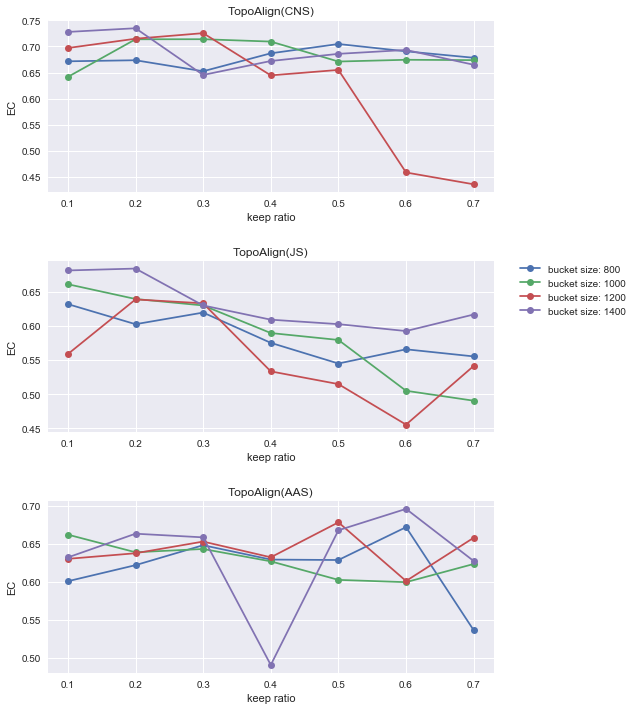

In [12]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name)
    
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


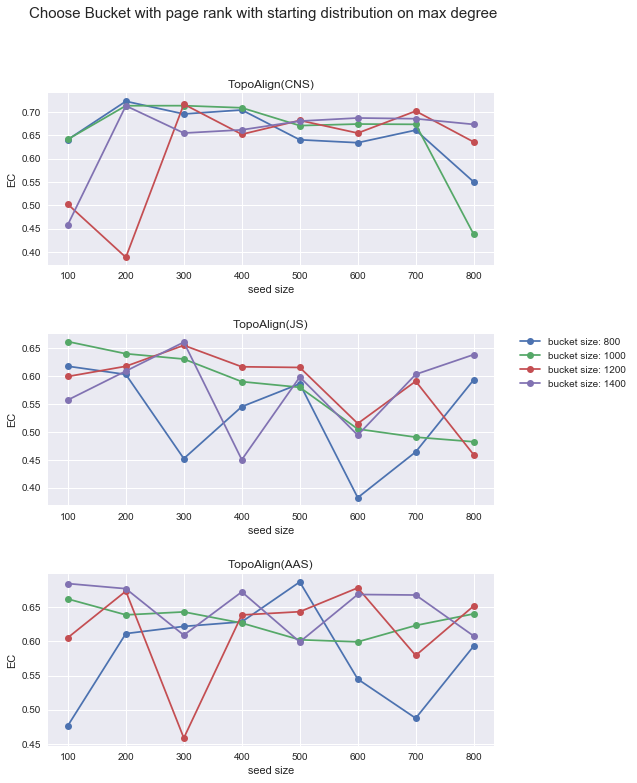

In [13]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.suptitle('Choose Bucket with page rank with starting distribution on max degree', fontsize=15)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name)
    
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.savefig("seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

## Pagerank Degree - Node Degree Plot
---

In [4]:
%%capture
# create the combined biological alignment network
bio_net = organism.BioNet(organism_objs[0], organism_objs[1], 'raw_blast')

G1 = nx.Graph()
G1.add_nodes_from(range(bio_net.org1.node_count))
G1.add_edges_from(bio_net.org1.edges)

G2 = nx.Graph()
G2.add_nodes_from(range(bio_net.org2.node_count))
G2.add_edges_from(bio_net.org2.edges)

sim_dim = (bio_net.org1.node_count, bio_net.org2.node_count)
net_sim = bio_net.similarity.reshape(sim_dim)
net_pure_sim = bio_net.blast_sim.reshape(sim_dim)

max_ind = np.unravel_index(np.argmax(net_sim), net_sim.shape)
max_ind = np.unravel_index(np.argmax(net_pure_sim), net_pure_sim.shape)

personalization1 = {i: 0 for i in range(bio_net.org1.node_count)}
personalization2 = {i: 0 for i in range(bio_net.org2.node_count)}

node_idx1 = bio_net.org1.degree.argsort()
node_idx2 = bio_net.org2.degree.argsort()

personalization1[node_idx1[-1]] = 1
personalization2[node_idx2[-1]] = 1

PPR1 = nx.pagerank(G1, cs.SEED_PR_ALPHA, personalization1).items()
PPR2 = nx.pagerank(G2, cs.SEED_PR_ALPHA, personalization2).items()

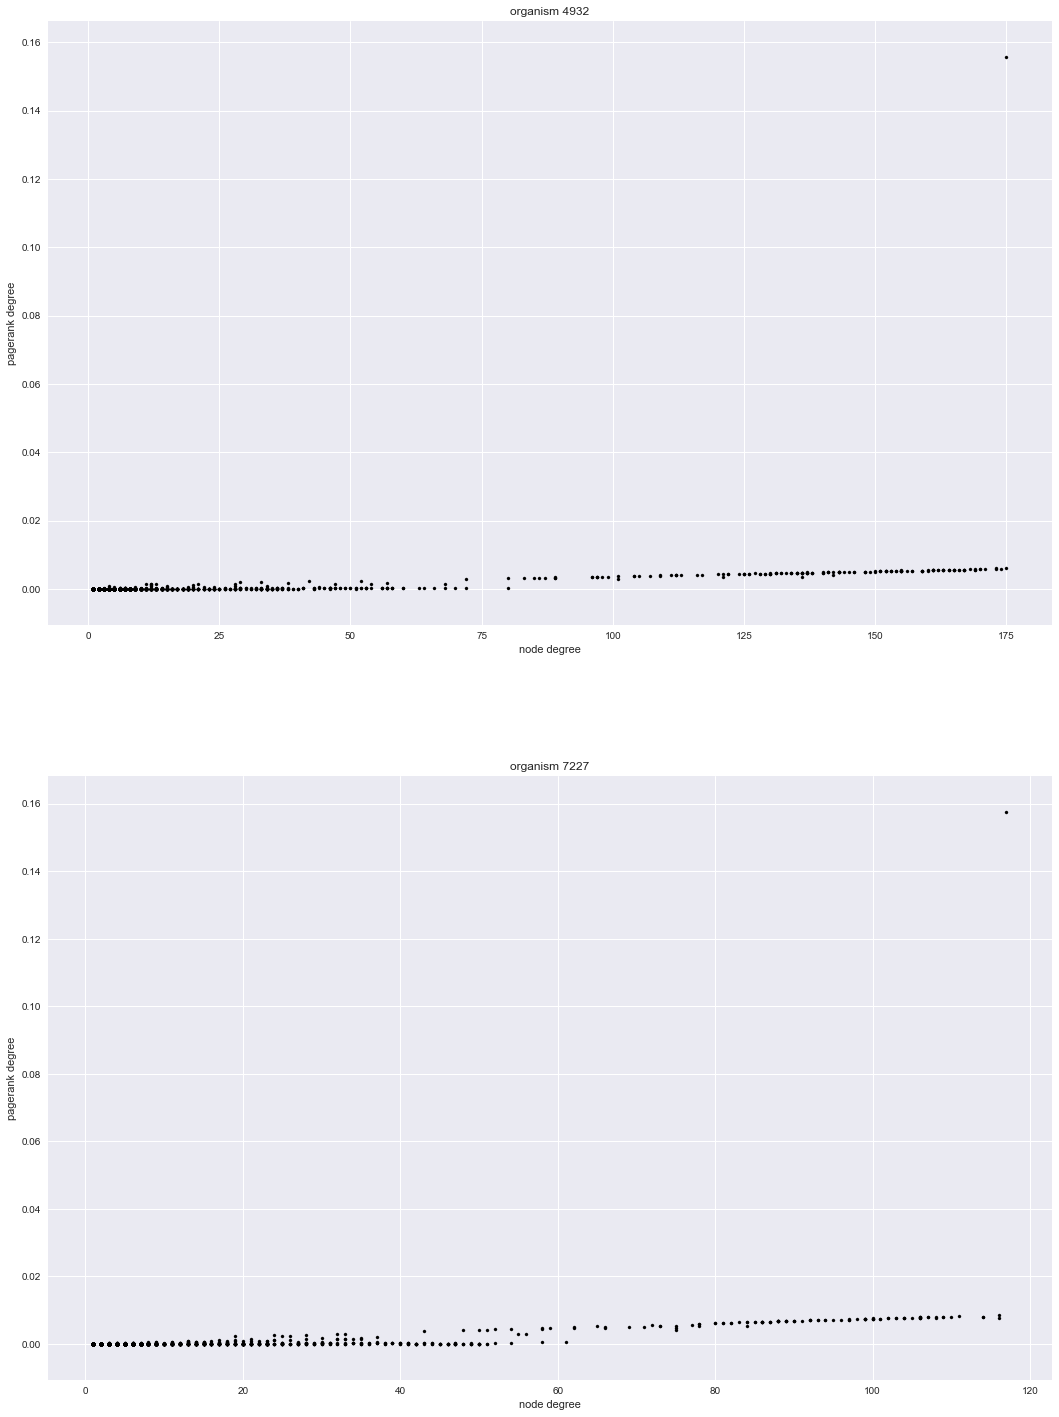

In [6]:
DEG1, VAL1 = [], []
for node, value in PPR1:
    DEG1.append(bio_net.org1.degree[node])
    VAL1.append(value)

DEG2, VAL2 = [], []
for node, value in PPR2:
    DEG2.append(bio_net.org2.degree[node])
    VAL2.append(value)

colors = (0, 0, 0)
area = np.pi*3

plt.subplot(211)
plt.scatter(DEG1, VAL1, s=area, c=colors)

plt.title('organism 4932')
plt.ylabel('pagerank degree')
plt.xlabel('node degree')

plt.subplot(212)
plt.scatter(DEG2, VAL2, s=area ,c=colors)
plt.rcParams["figure.figsize"] = [18, 25]

plt.title('organism 7227')
plt.ylabel('pagerank degree')
plt.xlabel('node degree')


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig("prd-degree.pdf", bbox_inches='tight')
plt.show()